In [ ]:
#breast cancer classifier using pytorch
!unzip /content/drive/My Drive/data/train/malignant.zip

unzip:  cannot find or open /content/drive/My, /content/drive/My.zip or /content/drive/My.ZIP.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
# step 1 load data
import numpy as np
import pandas as pt
import matplotlib as plt
from glob import glob
import cv2                
import matplotlib.pyplot as plt    
benign_train = np.array(glob("/content/drive/My Drive/data/train/benign/*"))
malignant_train = np.array(glob("/content/drive/My Drive/data/train/malignant/*"))
print('There are %d total benign cancer images.' % len(benign_train))
print('There are %d total malignant cancer images.' % len(malignant_train))

There are 2035 total benign cancer images.
There are 4951 total malignant cancer images.


In [ ]:
from keras.utils import to_categorical
# step 2 visualize images
# preparing the images for displaying 
combined_data = np.concatenate((benign_train, malignant_train), axis =0)
print (combined_data.shape)
benign_train_label = np.zeros(len(benign_train))
malignant_train_label = np.ones(len(malignant_train))
labels_train = np.concatenate((benign_train_label, malignant_train_label), axis = 0)
print ("Y train shape = ",labels_train.shape)

# create an array and shuffle it's indexes
random_array = np.arange(combined_data.shape[0])
np.random.shuffle(random_array)
X_train = combined_data[random_array]
Y_train = labels_train[random_array]
print (X_train.shape)
print (Y_train.shape)
Y_train_encoded = to_categorical(Y_train)
for i in range (20):
    print (X_train[i],"--->",Y_train[i],"--->", Y_train_encoded[i])
#print (X_train[:20],"--->", Y_train[:20])

(6986,)
Y train shape =  (6986,)
(6986,)
(6986,)
/content/drive/My Drive/data/train/benign/SOB_B_PT-14-21998AB-100-027.png ---> 0.0 ---> [1. 0.]
/content/drive/My Drive/data/train/malignant/SOB_M_DC-14-11951-400-001.png ---> 1.0 ---> [0. 1.]
/content/drive/My Drive/data/train/malignant/SOB_M_DC-14-20629-40-022.png ---> 1.0 ---> [0. 1.]
/content/drive/My Drive/data/train/malignant/SOB_M_DC-14-20629-100-003.png ---> 1.0 ---> [0. 1.]
/content/drive/My Drive/data/train/malignant/SOB_M_MC-14-16456-200-052.png ---> 1.0 ---> [0. 1.]
/content/drive/My Drive/data/train/malignant/SOB_M_DC-14-6241-400-010.png ---> 1.0 ---> [0. 1.]
/content/drive/My Drive/data/train/malignant/SOB_M_DC-14-16188-40-003.png ---> 1.0 ---> [0. 1.]
/content/drive/My Drive/data/train/malignant/SOB_M_DC-14-17614-40-023.png ---> 1.0 ---> [0. 1.]
/content/drive/My Drive/data/train/malignant/SOB_M_DC-14-13993-400-025.png ---> 1.0 ---> [0. 1.]
/content/drive/My Drive/data/train/benign/SOB_B_A-14-22549CD-40-016.png ---> 0.0 --

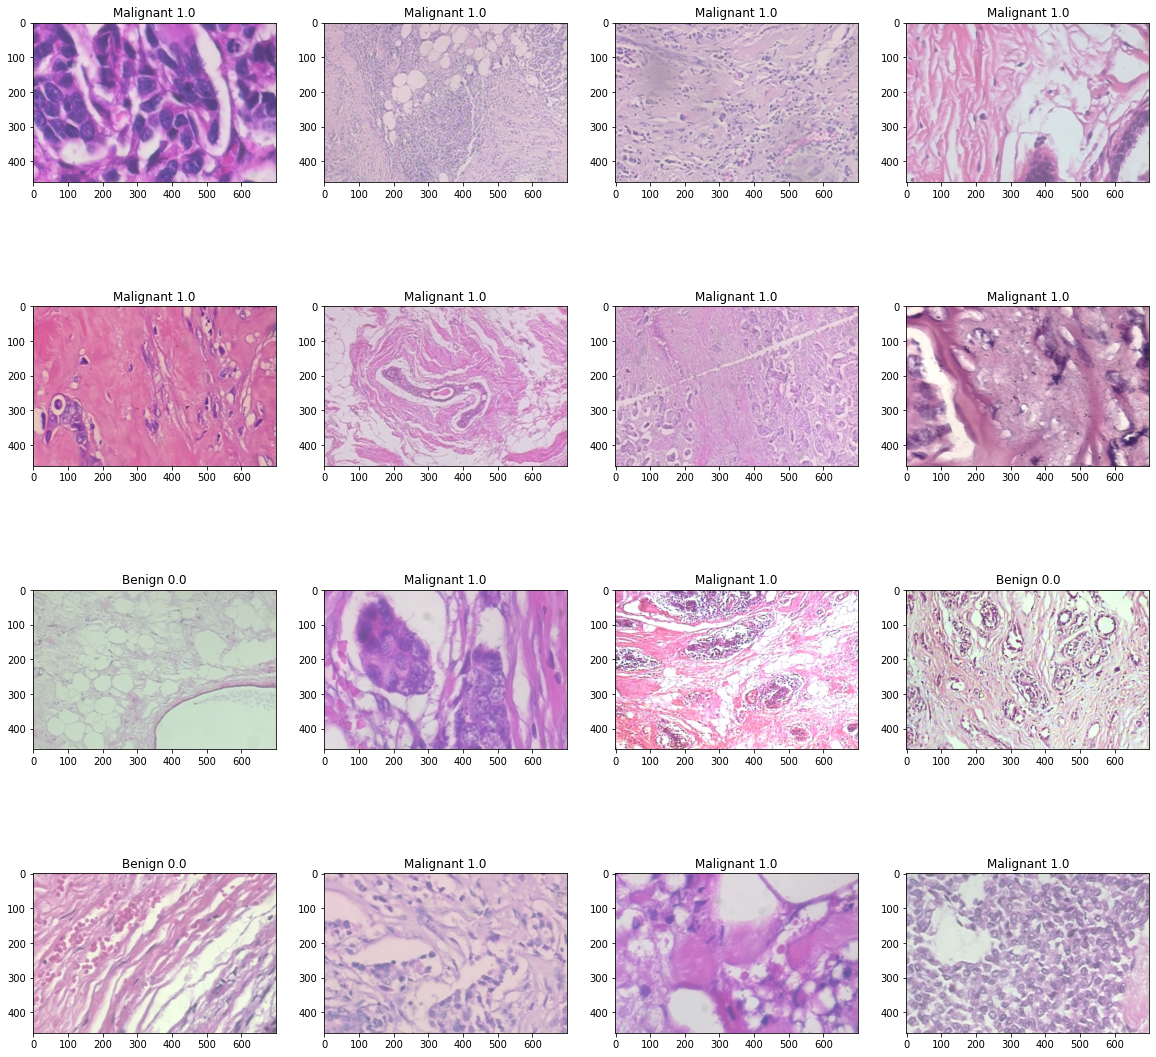

In [10]:
'''
random_number = np.random.randint(0, malignant_train.shape[0])
print (random_number)
img = cv2.imread(malignant_train[random_number])
plt.imshow(img)
plt.show()
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
'''
w=60
h=40
fig=plt.figure(figsize=(20, 20))
columns = 4
rows = 4

for i in range(1, columns*rows +1):
    # i represents which subplot you want to work on
    ax = fig.add_subplot(rows, columns, i)
    
    if np.argmax(Y_train_encoded[i]) == 0:
        #benign
        text = "Benign "+str(Y_train[i])
        ax.title.set_text(text)
    else:
        #malignant
        text = "Malignant "+(str(Y_train[i]))
        ax.title.set_text(text)
    img = cv2.imread(X_train[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    #plt.imshow(X_train[i], interpolation='nearest')
plt.show()

In [11]:
# step3 data augmentation and preparation
## TODO: Specify data loaders
import os
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets
from PIL import Image
import torchvision.transforms as transforms
import torch
# Set PIL to be tolerant of image files that are truncated.
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

train_dir = '/content/drive/My Drive/data/train/'
test_dir = '/content/drive/My Drive/data/test/'
valid_dir = '/content/drive/My Drive/data/validate/'

data_transform = transforms.Compose([transforms.RandomResizedCrop(224), 
                                     transforms.RandomHorizontalFlip(), # randomly flip and rotate
                                     transforms.RandomRotation(10),
                                     transforms.ToTensor(),
                                     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Data set directories
train_data = datasets.ImageFolder(train_dir, transform=data_transform)
test_data = datasets.ImageFolder(test_dir, transform=data_transform)
valid_data = datasets.ImageFolder(valid_dir, transform=data_transform)
# print out some data stats
print('Num training images: ', len(train_data))
print('Num test images: ', len(test_data))
#print (type(train_data))

batch_size = 20
num_workers=0

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
                                          num_workers=num_workers, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, 
                                          num_workers=num_workers, shuffle=True)

loaders_transfer={
    'train': train_loader,
    'valid': valid_loader,
    'test': test_loader
    
}
# get the classes
classes = list(np.array(glob("/content/drive/My Drive/data/train/*")))
print (classes)

Num training images:  6986
Num test images:  415
['/content/drive/My Drive/data/train/benign', '/content/drive/My Drive/data/train/malignant']


In [12]:
for item in loaders_transfer['train'].dataset.classes:
    print (item)
    

benign
malignant


In [13]:
# step 4a - choose model and write train, test
# using VGG-16 model for transfer learning
from torchvision import models
import torch.nn as nn
from torch import optim
model = models.vgg16(pretrained=True)

# move to gpu if available
#if use_cuda:
#    model = model.cuda()
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
'''
if use_cuda:
    print ("Cuda available")
    model = model.cuda()

'''
# Freeze model weights
for param in model.parameters():
    param.requires_grad = False
# Add on classifier
# here n_classes = 2 - benign or malignant
n_classes = 2
n_inputs = model.classifier[6].in_features
model.classifier[6] = nn.Sequential(
                      nn.Linear(n_inputs, 256), 
                      nn.ReLU(), 
                      nn.Dropout(0.4),
                      nn.Linear(256, n_classes),                   
                      nn.LogSoftmax(dim=1))
print (model)
if use_cuda:
    print ("Cuda available")
    model = model.cuda()
# Loss and optimizer
#criteration = nn.NLLLoss()
#optimizer = optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.classifier.parameters(), lr=0.01)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [14]:
#Step 4b - write the train method
# creating list for training loss and validation loss
train_loss_history=[]
valid_loss_history = []
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    # Number of epochs already trained (if using loaded in model weights)
    try:
        print(f'Model has been trained for: {model.epochs} epochs.\n')
    except:
        model.epochs = 0
        print(f'Starting Training from Scratch.\n')
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        train_acc = 0
        valid_acc = 0
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
           
            
            ## find the loss and update the model parameters accordingly
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            train_loss_history.append(train_loss)
            ## change according to batch size
            if batch_idx % 20 == 0:
            #if batch_idx % 100 == 0:
                print('Epoch %d, Batch %d loss: %.6f' %
                  (epoch, batch_idx + 1, train_loss))
            ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            output = model(data)
            loss = criterion(output, target)
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            valid_loss_history.append(valid_loss)


            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            torch.save(model.state_dict(), save_path)
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            valid_loss_min = valid_loss
            
    # return trained model
    return model

In [15]:
# step 4.b code for testing
test_loss_history = []
def test(loaders, model, criterion, use_cuda):
    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        test_loss_history.append(test_loss)
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        # compare predictions to true label
        '''
        target.data.view_as(pred) : in view_as we pass the tensor whose shape has to be mimicked. View tensor shares the same underlying data with its base tensor. Supporting View avoids explicit data copy, thus allows us to do fast and memory efficient reshaping, slicing and element-wise operations.
        pred.eq(target.data.view_as(pred))  .eq() function compares the values in two tensors and if they match, returns a 1. If they don’t match, it returns a 0:
        Basically - till here we are comparing the prediction and target - checking if they are same or not
        np.squeeze(pred.eq(target.data.view_as(pred))
        By summing the output of the .eq() function, we get a count of the number of times the neural network has produced a correct output, and we take an accumulating sum of these correct predictions so that we can determine the overall accuracy of the network on our test data set. 
        Awesome explaination at: https://adventuresinmachinelearning.com/pytorch-tutorial-deep-learning/
        '''
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))
    

In [16]:
# Step 5 - prediction
n_epochs = 25
model_transfer = train(n_epochs, loaders_transfer, model, optimizer, criterion, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))
test(loaders_transfer, model, criterion, use_cuda)
print("done")

Starting Training from Scratch.

Epoch 1, Batch 1 loss: 0.756580
Epoch 1, Batch 21 loss: 0.611031
Epoch 1, Batch 41 loss: 0.609507
Epoch 1, Batch 61 loss: 0.599598
Epoch 1, Batch 81 loss: 0.577119
Epoch 1, Batch 101 loss: 0.560057
Epoch 1, Batch 121 loss: 0.553153
Epoch 1, Batch 141 loss: 0.541469
Epoch 1, Batch 161 loss: 0.532020
Epoch 1, Batch 181 loss: 0.528818
Epoch 1, Batch 201 loss: 0.522369
Epoch 1, Batch 221 loss: 0.519733
Epoch 1, Batch 241 loss: 0.515075
Epoch 1, Batch 261 loss: 0.507925
Epoch 1, Batch 281 loss: 0.505257
Epoch 1, Batch 301 loss: 0.501569
Epoch 1, Batch 321 loss: 0.499224
Epoch 1, Batch 341 loss: 0.498431
Epoch: 1 	Training Loss: 0.498428 	Validation Loss: 0.577182
Validation loss decreased (inf --> 0.577182).  Saving model ...
Epoch 2, Batch 1 loss: 0.530132
Epoch 2, Batch 21 loss: 0.472087
Epoch 2, Batch 41 loss: 0.446499
Epoch 2, Batch 61 loss: 0.460261
Epoch 2, Batch 81 loss: 0.460666
Epoch 2, Batch 101 loss: 0.454429
Epoch 2, Batch 121 loss: 0.458512
Epoc

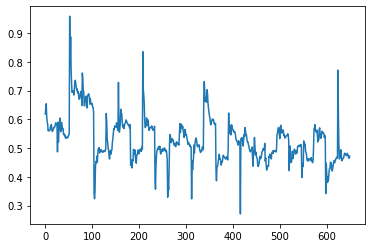

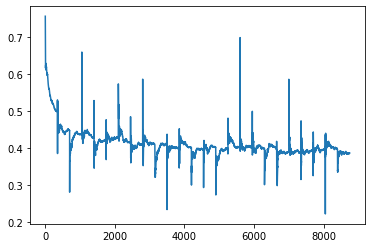

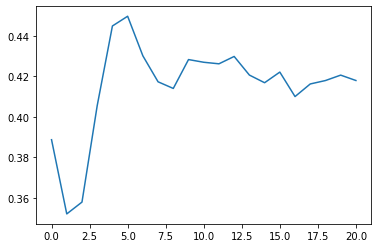

In [20]:
#step 6 - display results
plt.plot(valid_loss_history)
plt.show()
plt.plot(train_loss_history)
plt.show()
plt.plot(test_loss_history)
plt.show()

In [ ]:
# step 7 - confusion matrix and performance analysis

In [21]:
# Step 8 - Write a function to test your algorithm on any input image
from PIL import Image
import torchvision.transforms as transforms
# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item for item in loaders_transfer['train'].dataset.classes]
#print(class_names)
def predict_type_cancer(img_path):
    # load the image and return the predicted type of cancer
    # Open image
    img = Image.open(img_path)
    # Tranforms
    transform = transforms.Compose([
        transforms.RandomResizedCrop(224),                                   
        transforms.ToTensor(),                     
        transforms.Normalize(  
            
            mean=[0.485, 0.456, 0.406],                
            std=[0.229, 0.224, 0.225] 
            
    )])
    
    img_transformed = transform(img)
    
    #Define a batch to be passed through the network
    batch_t = torch.unsqueeze(img_transformed, 0)
    
    model.eval()
    output = model(batch_t)
    #print (output.shape)
    #max_val, index = torch.max(output,1)
    idx = torch.argmax(output)
    return class_names[idx]

In [1]:
benign_test = np.array(glob("/content/drive/My Drive/data/test/benign/*"))
malignant_test = np.array(glob("/content/drive/My Drive/data/test/malignant/*"))
print('There are %d total test benign cancer images.' % len(benign_test))
print('There are %d total test malignant cancer images.' % len(malignant_test))
combined_data_test = np.concatenate((benign_test, malignant_test), axis =0)
print (combined_data_test.shape)
benign_test_label = np.zeros(len(benign_test))
malignant_test_label = np.ones(len(malignant_test))
labels_test = np.concatenate((benign_test_label, malignant_test_label), axis = 0)
print ("Y train shape = ",labels_test.shape)

# create an array and shuffle it's indexes
random_array = np.arange(combined_data_test.shape[0])
np.random.shuffle(random_array)
X_test = combined_data[random_array]
Y_test = labels_train[random_array]
print (X_test.shape)
print (Y_test.shape)
Y_test_encoded = to_categorical(Y_test)
for i in range (20):
    print (X_test[i],"--->",Y_test[i],"--->", Y_test_encoded[i])
#print (X_train[:20],"--->", Y_train[:20])

def run_app(img_path):

    img = Image.open(img_path)
    plt.imshow(img)
    plt.show()
    prediction = predict_type_cancer(img_path)
    print ("Predicted type of cancer {0}".format(prediction))
    return prediction
    
w=60
h=40
fig=plt.figure(figsize=(20, 20))
columns = 4
rows = 4

for i in range(1, columns*rows +1):
    # i represents which subplot you want to work on
    ax = fig.add_subplot(rows, columns, i)
    pred = run_app(X_test[i])
    if np.argmax(Y_test_encoded[i]) == 0:
        #benign
        text = "label: Benign "+str(Y_test[i]) + "prediction = " + pred
        ax.title.set_text(text)
    else:
        #malignant
        text = "label: Malignant "+(str(Y_train[i]))+ "prediction = " + pred
        ax.title.set_text(text)
    img = cv2.imread(X_test[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    #plt.imshow(X_train[i], interpolation='nearest')
plt.show()

NameError: ignored